## Install data

In [1]:
!wget http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamSeq01/CamSeq01.zip

--2023-11-24 20:35:00--  http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamSeq01/CamSeq01.zip
Resolving mi.eng.cam.ac.uk (mi.eng.cam.ac.uk)... 129.169.82.147
Connecting to mi.eng.cam.ac.uk (mi.eng.cam.ac.uk)|129.169.82.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94535380 (90M) [application/zip]
Saving to: ‘CamSeq01.zip’

CamSeq01.zip         10%[=>                  ]   9.74M  12.9KB/s    eta 64m 50s^C


In [ ]:
!unzip 'CamSeq01.zip' -d 'CamSeq01/'

Archive:  CamSeq01.zip
  inflating: CamSeq01/0016E5_07977_L.png  
  inflating: CamSeq01/0016E5_07979_L.png  
  inflating: CamSeq01/0016E5_07981_L.png  
  inflating: CamSeq01/0016E5_07983_L.png  
  inflating: CamSeq01/0016E5_07985_L.png  
  inflating: CamSeq01/0016E5_07987_L.png  
  inflating: CamSeq01/0016E5_07989_L.png  
  inflating: CamSeq01/0016E5_07991_L.png  
  inflating: CamSeq01/0016E5_07993_L.png  
  inflating: CamSeq01/0016E5_07995_L.png  
  inflating: CamSeq01/0016E5_07997_L.png  
  inflating: CamSeq01/0016E5_07999_L.png  
  inflating: CamSeq01/0016E5_08001_L.png  
  inflating: CamSeq01/0016E5_08003_L.png  
  inflating: CamSeq01/0016E5_08005_L.png  
  inflating: CamSeq01/0016E5_08007_L.png  
  inflating: CamSeq01/0016E5_08009_L.png  
  inflating: CamSeq01/0016E5_08011_L.png  
  inflating: CamSeq01/0016E5_08013_L.png  
  inflating: CamSeq01/0016E5_08015_L.png  
  inflating: CamSeq01/0016E5_08017_L.png  
  inflating: CamSeq01/0016E5_08019_L.png  
  inflating: CamSeq01/0016E5_08

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.transforms import transforms

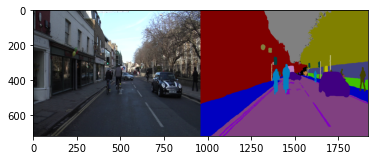

In [ ]:
img_dir = 'CamSeq01'
img = cv2.imread(img_dir + '/0016E5_07959.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

label = cv2.imread(img_dir + '/0016E5_07959_L.png')
label = cv2.cvtColor(label,cv2.COLOR_BGR2RGB)
plt.imshow(np.hstack([img,label]))

## Prepare data

In [ ]:
img_dir = 'CamSeq01'
labels = []
colors = {}

# 1 способ
# images = []
# for x in os.listdir(img_dir):
#     if (not x.split('.')[0].endswith('_L') and x.split('.')[1]!='txt'):
#         images.append(os.path.join(img_dir, x))

# 2 способ
images = [os.path.join(img_dir, x) for x in os.listdir(img_dir) if not x.split('.')[0].endswith('_L')]
images = [x for x in images if not x.endswith('txt')]
# print(images)
labels = [os.path.join(img_dir, x) for x in os.listdir(img_dir) if x.split('.')[0].endswith('_L')]
labels

['CamSeq01/0016E5_08113_L.png',
 'CamSeq01/0016E5_08041_L.png',
 'CamSeq01/0016E5_08097_L.png',
 'CamSeq01/0016E5_08037_L.png',
 'CamSeq01/0016E5_08105_L.png',
 'CamSeq01/0016E5_07989_L.png',
 'CamSeq01/0016E5_07969_L.png',
 'CamSeq01/0016E5_07961_L.png',
 'CamSeq01/0016E5_08003_L.png',
 'CamSeq01/0016E5_08021_L.png',
 'CamSeq01/0016E5_07991_L.png',
 'CamSeq01/0016E5_08051_L.png',
 'CamSeq01/0016E5_08063_L.png',
 'CamSeq01/0016E5_07985_L.png',
 'CamSeq01/0016E5_07995_L.png',
 'CamSeq01/0016E5_08145_L.png',
 'CamSeq01/0016E5_08125_L.png',
 'CamSeq01/0016E5_08111_L.png',
 'CamSeq01/0016E5_08077_L.png',
 'CamSeq01/0016E5_08031_L.png',
 'CamSeq01/0016E5_08155_L.png',
 'CamSeq01/0016E5_07987_L.png',
 'CamSeq01/0016E5_08089_L.png',
 'CamSeq01/0016E5_08065_L.png',
 'CamSeq01/0016E5_08067_L.png',
 'CamSeq01/0016E5_08057_L.png',
 'CamSeq01/0016E5_08019_L.png',
 'CamSeq01/0016E5_07977_L.png',
 'CamSeq01/0016E5_07999_L.png',
 'CamSeq01/0016E5_08143_L.png',
 'CamSeq01/0016E5_08017_L.png',
 'CamSeq

In [ ]:
import re

colors = {}
with open(os.path.join(img_dir, 'label_colors.txt')) as f:
    lines = f.readlines()

for l in lines:
    name = re.findall('[A-Za-z]+', l)[0]
    color = [int(re.findall('\d+',l)[i]) for i in range(3)]
    colors[name] = color

In [ ]:
colors

{'Animal': [64, 128, 64],
 'Archway': [192, 0, 128],
 'Bicyclist': [0, 128, 192],
 'Bridge': [0, 128, 64],
 'Building': [128, 0, 0],
 'Car': [64, 0, 128],
 'CartLuggagePram': [64, 0, 192],
 'Child': [192, 128, 64],
 'Column': [192, 192, 128],
 'Fence': [64, 64, 128],
 'LaneMkgsDriv': [128, 0, 192],
 'LaneMkgsNonDriv': [192, 0, 64],
 'Misc': [128, 128, 64],
 'MotorcycleScooter': [192, 0, 192],
 'OtherMoving': [128, 64, 64],
 'ParkingBlock': [64, 192, 128],
 'Pedestrian': [64, 64, 0],
 'Road': [128, 64, 128],
 'RoadShoulder': [128, 128, 192],
 'Sidewalk': [0, 0, 192],
 'SignSymbol': [192, 128, 128],
 'Sky': [128, 128, 128],
 'SUVPickupTruck': [64, 128, 192],
 'TrafficCone': [0, 0, 64],
 'TrafficLight': [0, 64, 64],
 'Train': [192, 64, 128],
 'Tree': [128, 128, 0],
 'Truck': [192, 128, 192],
 'Tunnel': [64, 0, 64],
 'VegetationMisc': [192, 192, 0],
 'Void': [0, 0, 0],
 'Wall': [64, 192, 0]}

In [ ]:
class CamSeqDataset(Dataset):
    def __init__(self, img_dir, colors, transform=None):
        super().__init__()
        self.images = [os.path.join(img_dir, x) for x in os.listdir(img_dir) if not x.split('.')[0].endswith('_L')]
        self.images = [x for x in self.images if not x.endswith('txt')]
        self.labels = [os.path.join(img_dir, x) for x in os.listdir(img_dir) if x.split('.')[0].endswith('_L')]
        self.colors = colors
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = cv2.imread(self.images[idx])
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

        label = cv2.imread(self.labels[idx])
        label = cv2.cvtColor(label,cv2.COLOR_BGR2RGB)

        mask = np.zeros((label.shape[0],label.shape[1]),dtype = np.int32)
        for i, cls in enumerate(self.colors.keys()):
            color = self.colors[cls]
            sub_mask = np.all(label==color,axis=-1)*i
            mask +=sub_mask

        if self.transform is not None:
            img = self.transform(img)
            mask = self.transform(mask).type(torch.LongTensor)
        return img, mask

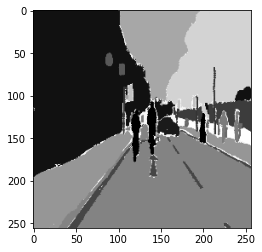

In [ ]:
image_transform = transforms.Compose([transforms.ToTensor(), transforms.Resize([256,256])])
dataset = CamSeqDataset(img_dir, colors, transform=image_transform)
batch_size = 4
train_size = int(len(dataset)*0.8)
train_set, test_set = random_split(dataset, [train_size, len(dataset)-train_size])

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size)

img, label = dataset[5]
plt.imshow(label[0],'gray')

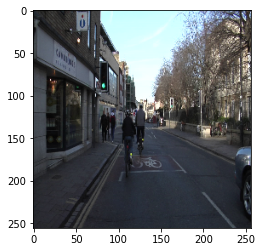

In [ ]:
plt.imshow(np.array(img).transpose(1,2,0))

## U-Net

In [ ]:
import torchvision
class Block(nn.Module):
    def __init__(self, inp, output):
        super().__init__()
        self.conv1 = nn.Conv2d(inp, output, 3, padding=1)
        self.relu  = nn.ReLU()
        self.conv2 = nn.Conv2d(output, output, 3, padding=1)
    def forward(self, x):
        return self.relu(self.conv2(self.relu(self.conv1(x))))

class Encoder(nn.Module):
    def __init__(self, channels=(3,32, 64,128,256,512)):
        super().__init__()
        self.encoder_blocks = nn.ModuleList([Block(channels[i], channels[i+1]) for i in range(len(channels)-1)])
        self.pool = nn.MaxPool2d(2)

    def forward(self, x):
        features = []
        for block in self.encoder_blocks:
            x = block(x)
            features.append(x)
            x = self.pool(x)
        return features

class Decoder(nn.Module):
    def __init__(self, channels=(512, 256, 128, 64, 32)):
        super().__init__()
        self.channels = channels
        self.upconvs = nn.ModuleList([nn.ConvTranspose2d(channels[i], channels[i+1], kernel_size=2, stride=2, padding=0)
                                      for i in range(len(channels)-1)])
        self.decoder_blocks = nn.ModuleList([Block(channels[i], channels[i+1]) for i in range(len(channels)-1)])

    def forward(self, x, encoder_features):
        for i in range(len(self.channels)-1):
            x = self.upconvs[i](x)
            encoder_feature = encoder_features[i]
            x = torch.cat([x, encoder_feature], dim=1)
            x = self.decoder_blocks[i](x)
        return x

class UNet(nn.Module):
    def __init__(self, encoder_channels=(3,32,64,128,256,512), decoder_channels=(512, 256, 128, 64, 32),
                 num_class=32):
        super().__init__()
        self.encoder     = Encoder(encoder_channels)
        self.decoder     = Decoder(decoder_channels)
        self.head        = nn.Conv2d(decoder_channels[-1], num_class, kernel_size=1)

    def forward(self, x):
        encoder_features = self.encoder(x)
        out      = self.decoder(encoder_features[::-1][0], encoder_features[::-1][1:])
        out      = self.head(out)
        return out

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
model = UNet()
model = model.to(device)
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizator = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [ ]:
num_epoch = 50
for epoch in range(num_epoch):
    loss_lst = []
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        # обнуляем градиенты
        optimizator.zero_grad()

        output = model(images)

        labels = labels.view(-1, 256,256)

        # вычисление ошибки
        loss = criterion(output, labels)

        # метод обратного распростанения ошибки или вычисление градиентов
        loss.backward()

        # корректировка весов
        optimizator.step()

        loss_lst.append(loss.item())

    if epoch%1==0:
        print(f"Epoch: {epoch} | Error {np.mean(loss_lst)}")


Epoch: 0 | Error 2.953695070743561
Epoch: 1 | Error 2.176375758647919
Epoch: 2 | Error 1.8176903188228608
Epoch: 3 | Error 1.714657336473465
Epoch: 4 | Error 1.6329775393009185
Epoch: 5 | Error 1.5462604939937592
Epoch: 6 | Error 1.3106481313705445
Epoch: 7 | Error 1.1970757842063904
Epoch: 8 | Error 1.136704894900322
Epoch: 9 | Error 1.0743567287921905
Epoch: 10 | Error 1.0590713620185852
Epoch: 11 | Error 1.0318738132715226
Epoch: 12 | Error 0.9880908250808715
Epoch: 13 | Error 0.9550847440958024
Epoch: 14 | Error 0.9543643593788147
Epoch: 15 | Error 0.9728953450918197
Epoch: 16 | Error 0.9185032725334168
Epoch: 17 | Error 0.897500404715538
Epoch: 18 | Error 0.8973546624183655
Epoch: 19 | Error 0.8812246233224869
Epoch: 20 | Error 0.8924470096826553
Epoch: 21 | Error 0.8687994956970215
Epoch: 22 | Error 0.8649851143360138
Epoch: 23 | Error 0.8657571911811829
Epoch: 24 | Error 0.8424548208713531
Epoch: 25 | Error 0.8436428844928742
Epoch: 26 | Error 0.8353365182876586
Epoch: 27 | Erro

KeyboardInterrupt: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# сохранение обученной модели на Google Disk
torch.save(model, 'drive/MyDrive/model_Unet.pth')

In [ ]:
model = torch.load('drive/MyDrive/model_Unet.pth')

## Test model

In [ ]:
for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    output = model(images)
    labels = labels.view(-1, 256,256)
    break

In [ ]:
print(images.shape)
print(output.shape)
print(labels.shape)

torch.Size([4, 3, 256, 256])
torch.Size([4, 32, 256, 256])
torch.Size([4, 256, 256])


(256, 256, 3)


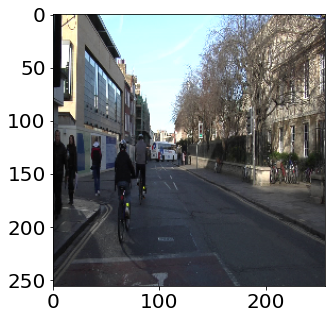

In [ ]:
img = np.array(images.cpu()[3]).transpose(1,2,0)
print(img.shape)
plt.imshow(img)

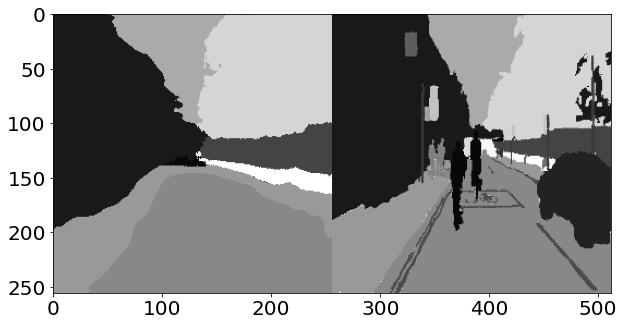

In [ ]:
plt.rcParams["figure.figsize"] = (10, 20)
pred = torch.argmax(output,dim=1)
plt.imshow(np.hstack([pred.cpu()[0], labels.cpu()[0]]),'gray')

In [ ]:
# метод для перевода изображений из градации серого в цветное с учетом colors
def vis_mask(mask, colors):
    values_mask = np.unique(mask)
    mask = cv2.cvtColor(np.array(mask).astype('uint8'), cv2.COLOR_GRAY2RGB)
    for i, color_name in enumerate(colors):
        mask_color = cv2.inRange(mask, np.array(
            [i, i, i]), np.array([i, i, i]))
        mask[mask_color == 255] = np.array(colors[color_name])
    return mask

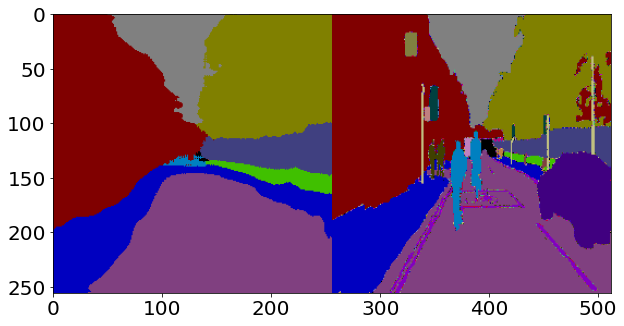

In [ ]:
plt.imshow(vis_mask(np.hstack([pred.cpu()[0], labels.cpu()[0]]),colors),'gray')

In [ ]:
# собираем изображения в массив
imgs = []
for i in range(images.shape[0]):

  # добавляем Original image
  img = np.array(images.cpu()[i]).transpose(1,2,0)
  imgs.append(img)

  # добавляем Predicted mask
  pred = torch.argmax(output,dim=1).cpu()[i]
  imgs.append(vis_mask(pred,colors))

  # добавляем Ground-truth mask
  label = labels.cpu()[0]
  imgs.append(vis_mask(label,colors))

In [ ]:
len(imgs)

12

In [ ]:
# метод для визуализации массива изображений
def visul(imgs, row=4, col=3, titles=[]):
    plt.rcParams['font.size'] = '20'
    plt.rcParams["figure.figsize"] = (col*10, row*10)
    fig, ax = plt.subplots(row, col)
    for index,ax in enumerate(fig.get_axes()):
        ax.imshow(imgs[index])
        if len(titles)>0 and index<col:
            ax.set_title(titles[index])
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.axis('off')
    plt.show()

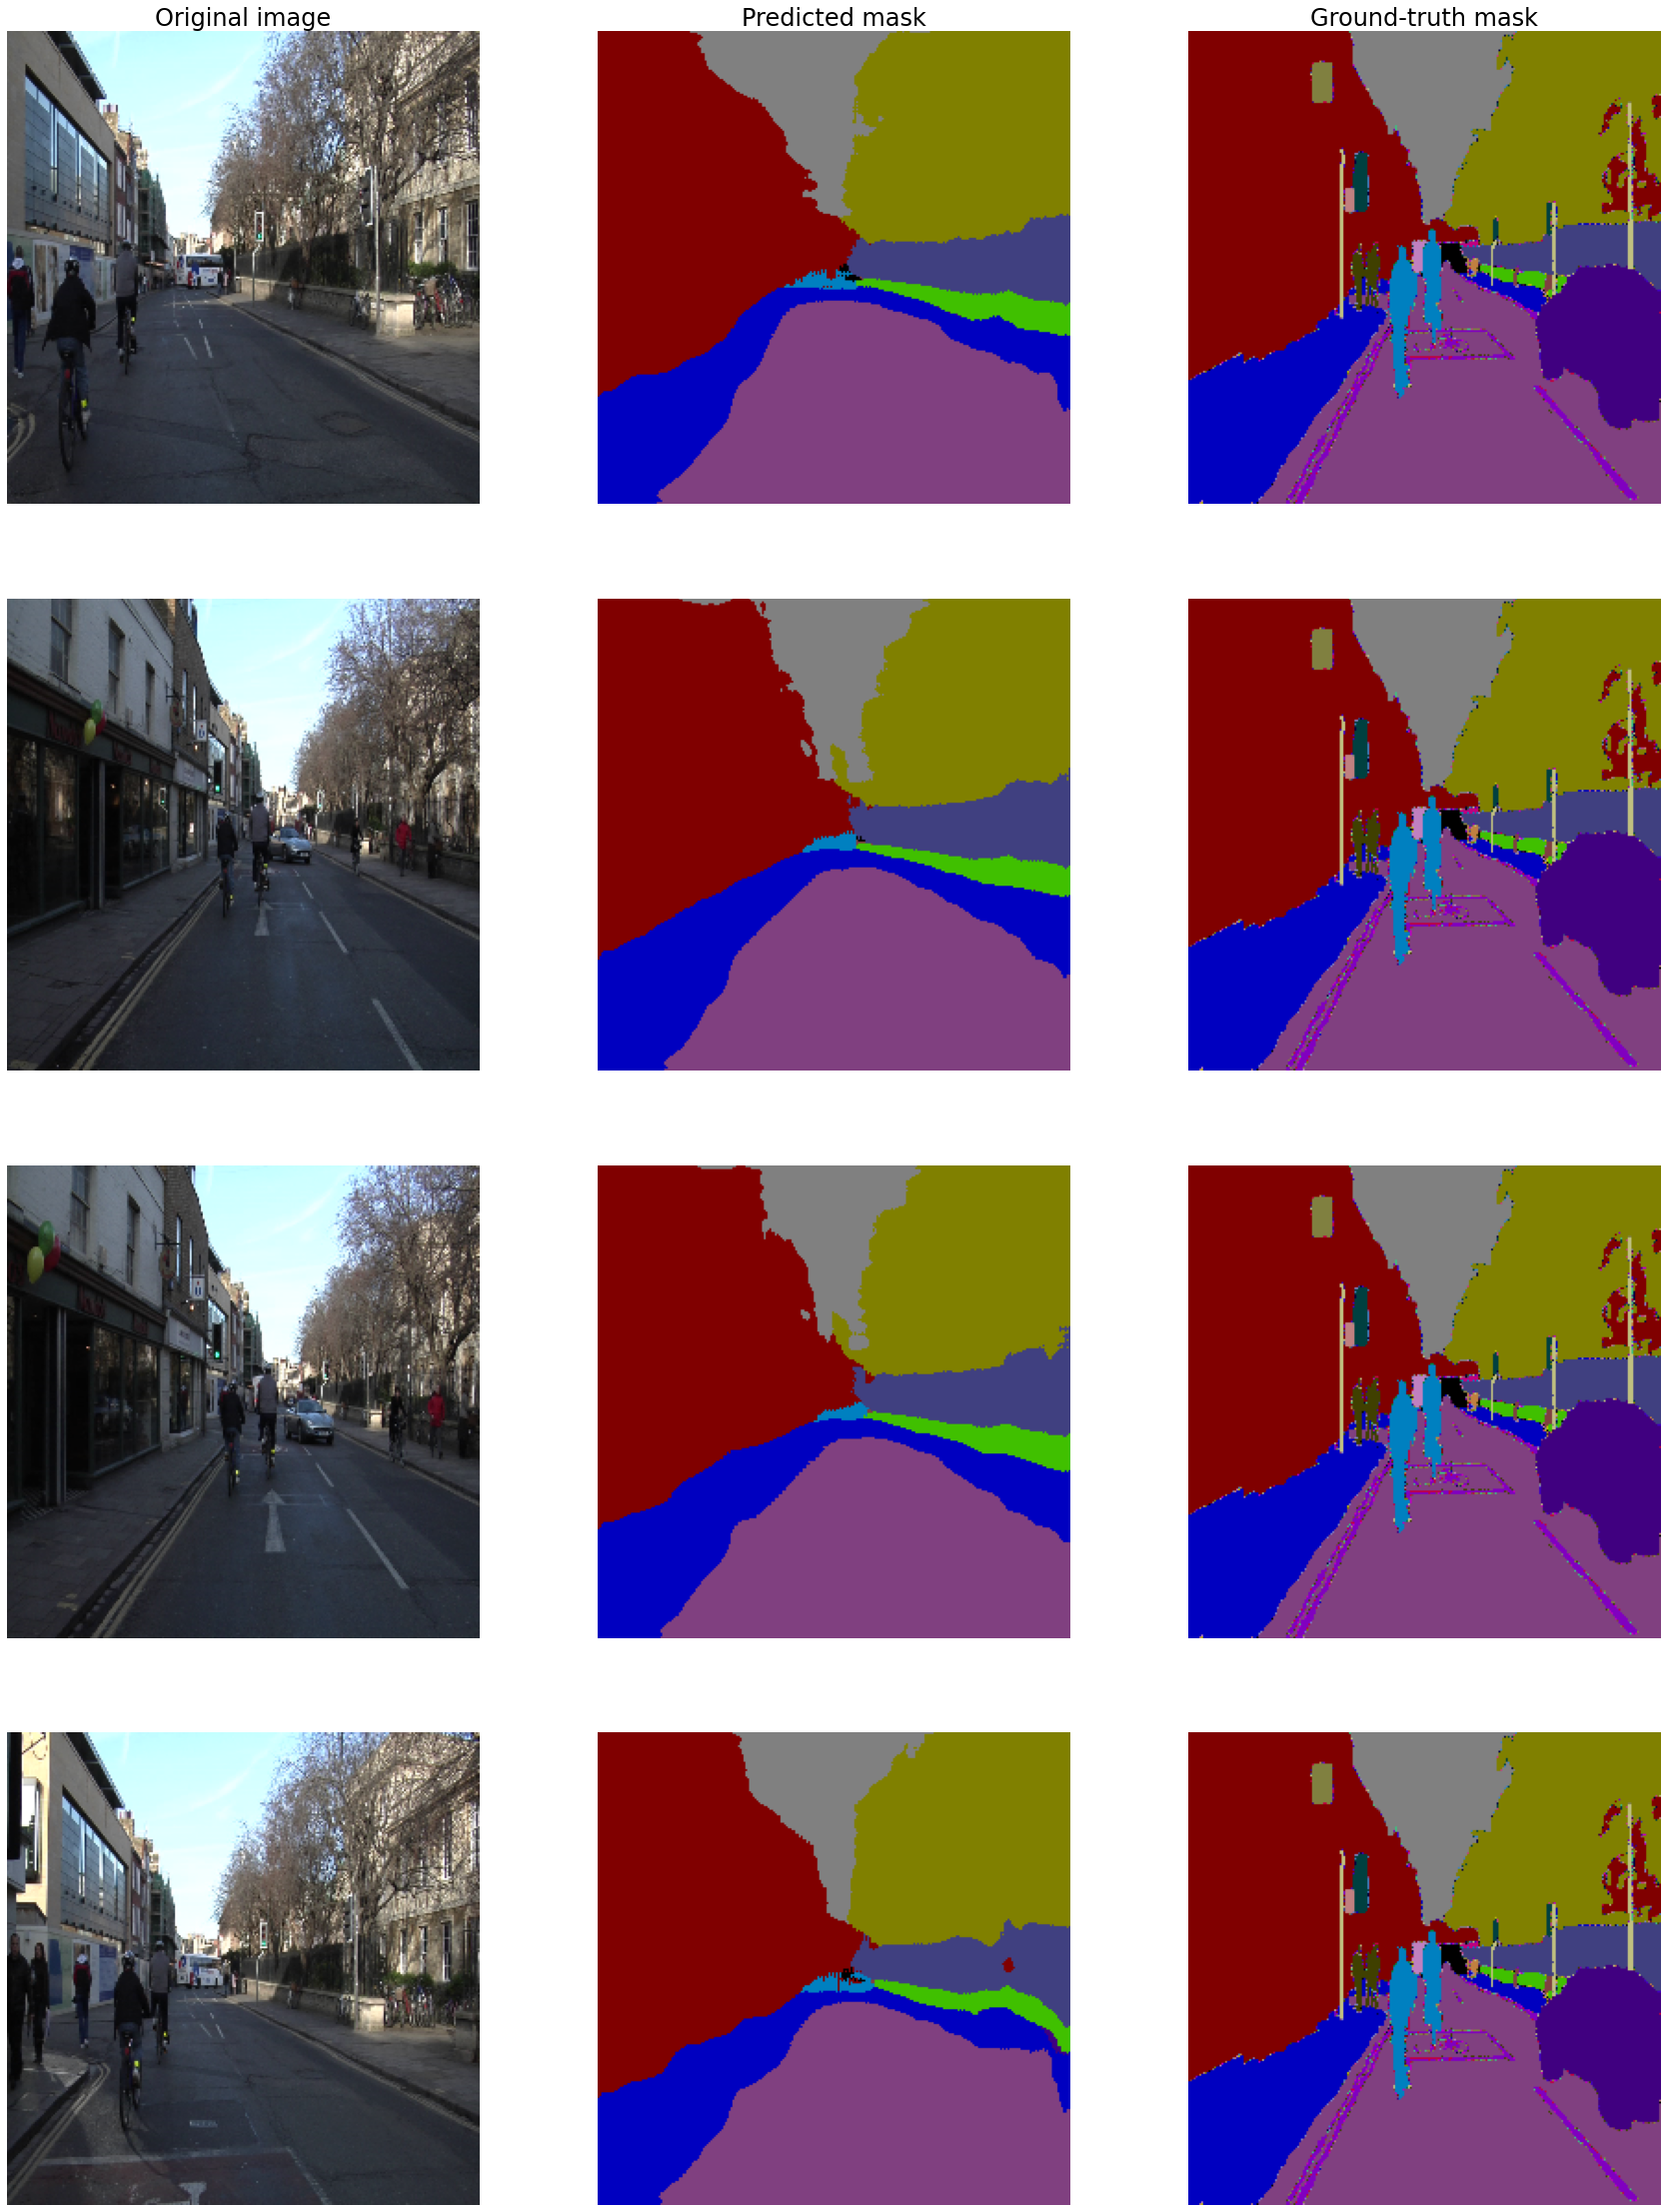

In [ ]:
visul(imgs, row=4,col=3,titles=['Original image','Predicted mask','Ground-truth mask'])